# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [91]:
import pandas as pd
import json
import requests
from api_keys import weather_api_key
import numpy as np
from citipy import citipy
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [64]:
city_list = []
lat_list = []
lng_list = []
for i in range(0,1500):
    lat = np.random.uniform(-90,90)
    lng = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat,lng).city_name 
    if city not in city_list: 
        city_list.append(city)
        lat_list.append(lat)
        lng_list.append(lng)
    
print(len(city_list))
print(len(lat_list))
print(len(lng_list))

583
583
583


In [67]:
cities_df = pd.DataFrame({'Nearest City' : city_list, 'Latitude' : lat_list, 'Longitude': lng_list})
cities_df = cities_df.rename(columns={0:'Nearest City'})
cities_df

,Nearest City,Latitude,Longitude
0,buon me thuot,12.498408,108.538659
1,busselton,-63.632887,86.729264
2,lavrentiya,72.063390,-173.120898
3,urussu,54.807694,53.373693
4,belaya gora,69.699525,146.233149
...,...,...,...
578,chunskiy,56.687720,100.225521
579,jaisinghnagar,23.781938,81.419756
580,xuanhua,39.748033,114.794620
581,constitucion,22.376346,-113.096267


In [68]:
cities_df

,Nearest City,Latitude,Longitude
0,buon me thuot,12.498408,108.538659
1,busselton,-63.632887,86.729264
2,lavrentiya,72.063390,-173.120898
3,urussu,54.807694,53.373693
4,belaya gora,69.699525,146.233149
...,...,...,...
578,chunskiy,56.687720,100.225521
579,jaisinghnagar,23.781938,81.419756
580,xuanhua,39.748033,114.794620
581,constitucion,22.376346,-113.096267


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

units = 'imperial'

cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

for index, row in cities_df.iterrows():
    query_url = f"{url}{row['Nearest City']}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:
        cities_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
    except (KeyError, IndexError):
        print(f"Missing City records for {index} : {row['Nearest City']} ... skipping.")
  

Missing City records for 0 : buon me thuot ... skipping.
Missing City records for 10 : ayios matthaios ... skipping.
Missing City records for 59 : mys shmidta ... skipping.
Missing City records for 71 : taolanaro ... skipping.
Missing City records for 79 : grand river south east ... skipping.
Missing City records for 107 : huajuapan ... skipping.
Missing City records for 114 : kazalinsk ... skipping.
Missing City records for 118 : one hundred mile house ... skipping.
Missing City records for 121 : temaraia ... skipping.
Missing City records for 132 : nizhneyansk ... skipping.
Missing City records for 133 : barentsburg ... skipping.
Missing City records for 140 : illoqqortoormiut ... skipping.
Missing City records for 144 : tsihombe ... skipping.
Missing City records for 169 : lolua ... skipping.
Missing City records for 180 : yandoon ... skipping.
Missing City records for 184 : doctor pedro p. pena ... skipping.
Missing City records for 205 : belushya guba ... skipping.
Missing City re

In [70]:
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,buon me thuot,12.498408,108.538659,,,,
1,busselton,-63.632887,86.729264,44.04,77,100,9.6
2,lavrentiya,72.063390,-173.120898,38.34,84,76,10.56
3,urussu,54.807694,53.373693,53.24,92,95,9.55
4,belaya gora,69.699525,146.233149,49.95,50,49,13.51
...,...,...,...,...,...,...,...
578,chunskiy,56.687720,100.225521,40.62,81,100,4.63
579,jaisinghnagar,23.781938,81.419756,78.76,27,94,4.43
580,xuanhua,39.748033,114.794620,60.49,51,33,5.73
581,constitucion,22.376346,-113.096267,56.95,79,99,11.18


In [73]:
cities_df['Temperature (F)'] = cities_df['Temperature (F)'].replace("", np.nan)
cities_df = cities_df.dropna(axis=0, subset=['Temperature (F)'])
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,busselton,-63.632887,86.729264,44.04,77,100,9.6
1,lavrentiya,72.063390,-173.120898,38.34,84,76,10.56
2,urussu,54.807694,53.373693,53.24,92,95,9.55
3,belaya gora,69.699525,146.233149,49.95,50,49,13.51
4,albany,-58.223640,123.310477,76.41,58,98,8.08
...,...,...,...,...,...,...,...
524,chunskiy,56.687720,100.225521,40.62,81,100,4.63
525,jaisinghnagar,23.781938,81.419756,78.76,27,94,4.43
526,xuanhua,39.748033,114.794620,60.49,51,33,5.73
527,constitucion,22.376346,-113.096267,56.95,79,99,11.18


In [75]:
cities_df = cities_df.reset_index(drop=True)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,busselton,-63.632887,86.729264,44.04,77,100,9.6
1,lavrentiya,72.063390,-173.120898,38.34,84,76,10.56
2,urussu,54.807694,53.373693,53.24,92,95,9.55
3,belaya gora,69.699525,146.233149,49.95,50,49,13.51
4,albany,-58.223640,123.310477,76.41,58,98,8.08
...,...,...,...,...,...,...,...
524,chunskiy,56.687720,100.225521,40.62,81,100,4.63
525,jaisinghnagar,23.781938,81.419756,78.76,27,94,4.43
526,xuanhua,39.748033,114.794620,60.49,51,33,5.73
527,constitucion,22.376346,-113.096267,56.95,79,99,11.18


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
cities_df.to_csv('Cities_Weather_Data.csv')

In [78]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)         object
Cloudiness (%)       object
Wind Speed (mph)     object
dtype: object

In [79]:
cities_df['Humidity (%)'] = cities_df['Humidity (%)'].astype(float)
cities_df['Cloudiness (%)'] = cities_df['Cloudiness (%)'].astype(float)
cities_df['Wind Speed (mph)'] = cities_df['Wind Speed (mph)'].astype(float)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,busselton,-63.632887,86.729264,44.04,77.0,100.0,9.60
1,lavrentiya,72.063390,-173.120898,38.34,84.0,76.0,10.56
2,urussu,54.807694,53.373693,53.24,92.0,95.0,9.55
3,belaya gora,69.699525,146.233149,49.95,50.0,49.0,13.51
4,albany,-58.223640,123.310477,76.41,58.0,98.0,8.08
...,...,...,...,...,...,...,...
524,chunskiy,56.687720,100.225521,40.62,81.0,100.0,4.63
525,jaisinghnagar,23.781938,81.419756,78.76,27.0,94.0,4.43
526,xuanhua,39.748033,114.794620,60.49,51.0,33.0,5.73
527,constitucion,22.376346,-113.096267,56.95,79.0,99.0,11.18


In [80]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
cities_df[cities_df['Humidity (%)']>100]

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [82]:
#  Get the indices of cities that have humidity over 100%.


In [83]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

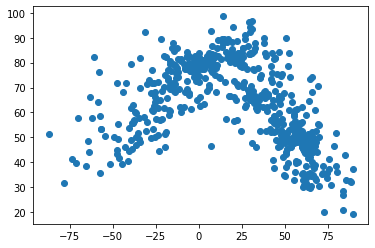

In [94]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature (F)'])
plt.show()

Analysis - The Temperatures increase as the latitude moves from latitudes -90 to 0 and from 90 to 0, 0 being the equator, -90 being southpole and 90 being northpole.

## Latitude vs. Humidity Plot

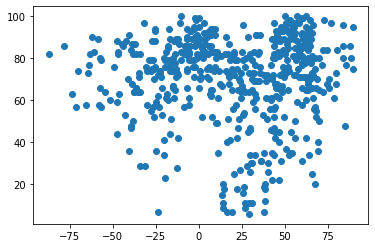

In [85]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity (%)'])

Analysis - 

## Latitude vs. Cloudiness Plot

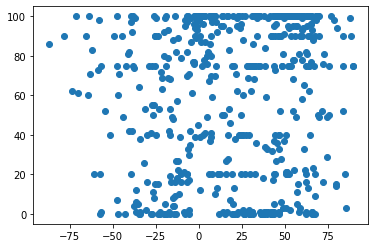

In [86]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness (%)'])

Analysis - 

## Latitude vs. Wind Speed Plot

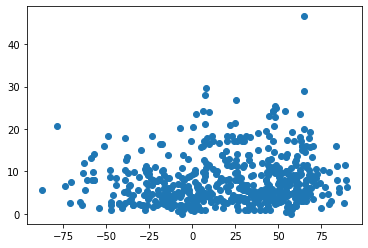

In [87]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed (mph)'])

Analysis - 

## Linear Regression

In [88]:
Northern_df = cities_df[cities_df['Latitude']>0]
Northern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,lavrentiya,72.063390,-173.120898,38.34,84.0,76.0,10.56
2,urussu,54.807694,53.373693,53.24,92.0,95.0,9.55
3,belaya gora,69.699525,146.233149,49.95,50.0,49.0,13.51
5,kayerkan,72.605425,87.167239,19.89,98.0,81.0,9.33
9,tasiilaq,64.895247,-33.763123,35.76,89.0,100.0,46.57
...,...,...,...,...,...,...,...
524,chunskiy,56.687720,100.225521,40.62,81.0,100.0,4.63
525,jaisinghnagar,23.781938,81.419756,78.76,27.0,94.0,4.43
526,xuanhua,39.748033,114.794620,60.49,51.0,33.0,5.73
527,constitucion,22.376346,-113.096267,56.95,79.0,99.0,11.18


In [89]:
Southern_df = cities_df[cities_df['Latitude']<0]
Southern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,busselton,-63.632887,86.729264,44.04,77.0,100.0,9.60
4,albany,-58.223640,123.310477,76.41,58.0,98.0,8.08
6,vaini,-25.577300,-172.878700,68.16,94.0,90.0,3.44
7,luderitz,-27.305103,8.558945,61.05,75.0,0.0,10.65
8,ushuaia,-78.471642,-29.020700,31.66,86.0,90.0,20.71
...,...,...,...,...,...,...,...
516,wanaka,-40.708847,166.756707,44.46,36.0,82.0,2.15
518,banjar,-16.635233,104.901340,80.46,89.0,53.0,2.24
519,unai,-16.377549,-47.029517,76.75,51.0,16.0,2.57
520,sao desiderio,-12.763519,-44.939803,77.81,28.0,18.0,4.32


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

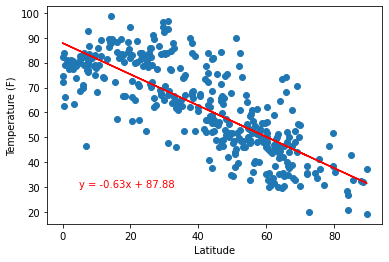

In [100]:
x = Northern_df['Latitude']
y = Northern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(5,30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

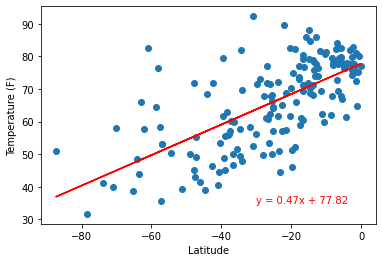

In [98]:
x = Southern_df['Latitude']
y = Southern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-30,35),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

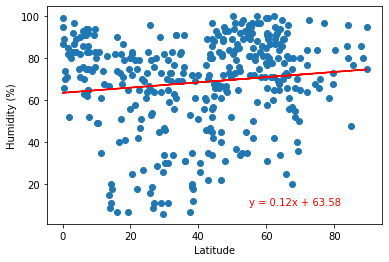

In [103]:
x = Northern_df['Latitude']
y = Northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

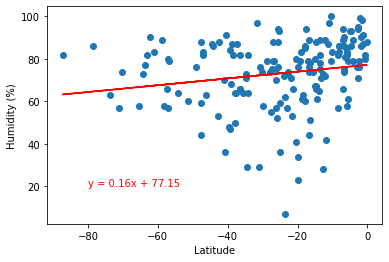

In [106]:
x = Southern_df['Latitude']
y = Southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-80,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

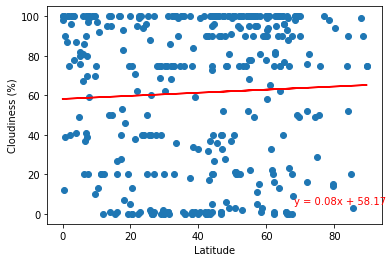

In [110]:
x = Northern_df['Latitude']
y = Northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

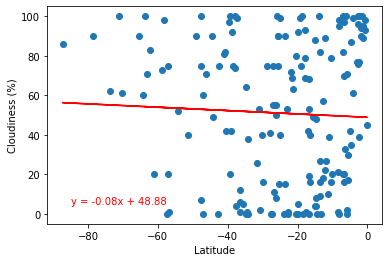

In [112]:
x = Southern_df['Latitude']
y = Southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

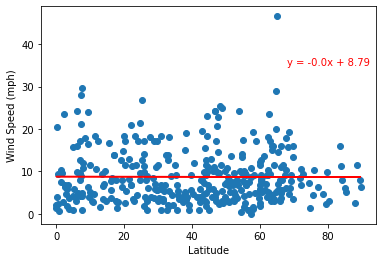

In [114]:
x = Northern_df['Latitude']
y = Northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,35),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

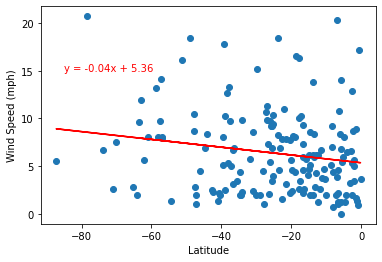

In [118]:
x = Southern_df['Latitude']
y = Southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()